In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)
for train_index,test_index in split.split(X,y):
    X_train, X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]

In [4]:
X_train_2k = X_train[:20000]

y_train_2k = y_train[:20000]

In [5]:
some_digit = X[0]

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_2k_scaled = scaler.fit_transform(X_train_2k.astype(np.float64))

In [9]:
svmclf_gs_poly = SVC(kernel="poly", random_state=42)
param_grid_gs_poly = [{'degree': [1, 2, 3],
               'C': [1,5,10],
              'coef0': [0,1,5]}]
svm_poly_gs = GridSearchCV(svmclf_gs_poly, param_grid_gs_poly, cv=3, scoring="accuracy",verbose=2)
svm_poly_gs.fit(X_train_2k_scaled, y_train_2k)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .............................C=1, coef0=0, degree=1; total time=  24.1s
[CV] END .............................C=1, coef0=0, degree=1; total time=  23.8s
[CV] END .............................C=1, coef0=0, degree=1; total time=  24.1s
[CV] END .............................C=1, coef0=0, degree=2; total time=  44.1s
[CV] END .............................C=1, coef0=0, degree=2; total time=  42.7s
[CV] END .............................C=1, coef0=0, degree=2; total time=  43.1s
[CV] END .............................C=1, coef0=0, degree=3; total time= 1.1min
[CV] END .............................C=1, coef0=0, degree=3; total time= 1.1min
[CV] END .............................C=1, coef0=0, degree=3; total time= 1.1min
[CV] END .............................C=1, coef0=1, degree=1; total time=  25.0s
[CV] END .............................C=1, coef0=1, degree=1; total time=  23.6s
[CV] END .............................C=1, coef0

GridSearchCV(cv=3, estimator=SVC(kernel='poly', random_state=42),
             param_grid=[{'C': [1, 5, 10], 'coef0': [0, 1, 5],
                          'degree': [1, 2, 3]}],
             scoring='accuracy', verbose=2)

In [10]:
svm_poly_gs.best_params_

{'C': 5, 'coef0': 0, 'degree': 2}

In [11]:
svm_poly_gs.predict([some_digit])

array([1], dtype=uint8)

In [13]:
svmclf_gs_rbf = SVC(kernel="rbf", random_state=42)
param_grid_gs_rbf = [{'C': [0.01,1,10],'gamma': [0.01, 1,10]}]
svm_rbf_gs = GridSearchCV(svmclf_gs_rbf, param_grid_gs_rbf, cv=3, scoring="accuracy",verbose=2)
svm_rbf_gs.fit(X_train_2k_scaled, y_train_2k)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .................................C=0.01, gamma=0.01; total time= 2.8min
[CV] END .................................C=0.01, gamma=0.01; total time= 2.8min
[CV] END .................................C=0.01, gamma=0.01; total time= 2.8min
[CV] END ....................................C=0.01, gamma=1; total time= 3.1min
[CV] END ....................................C=0.01, gamma=1; total time= 3.1min
[CV] END ....................................C=0.01, gamma=1; total time= 3.1min
[CV] END ...................................C=0.01, gamma=10; total time= 3.1min
[CV] END ...................................C=0.01, gamma=10; total time= 3.1min
[CV] END ...................................C=0.01, gamma=10; total time= 3.2min
[CV] END ....................................C=1, gamma=0.01; total time= 2.3min
[CV] END ....................................C=1, gamma=0.01; total time= 2.3min
[CV] END ....................................C=1,

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.01, 1, 10], 'gamma': [0.01, 1, 10]}],
             scoring='accuracy', verbose=2)

In [14]:
svm_rbf_gs.best_params_

{'C': 10, 'gamma': 0.01}

In [15]:
svm_rbf_gs.predict([some_digit])

array([2], dtype=uint8)

In [16]:
from sklearn.preprocessing import StandardScaler

svmclf_gs_lin = SVC(kernel="linear", random_state=42)
param_grid_gs_lin = [{'C': [0.1, 1, 10],'tol': [1e-3, 1e-4, 1e-5],'max_iter': [1000, 2500, 5000]}]
svm_lin_gs = GridSearchCV(svmclf_gs_lin, param_grid_gs_lin, cv=3, scoring="accuracy",verbose=2)
svm_lin_gs.fit(X_train_2k_scaled, y_train_2k)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=  19.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=  18.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=0.001; total time=  18.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=  18.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=1000, tol=0.0001; total time=  17.3s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=1e-05; total time=  18.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=1e-05; total time=  16.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=1000, tol=1e-05; total time=  17.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=2500, tol=0.001; total time=  17.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=2500, tol=0.001; total time=  16.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=2500, tol=0.001; total time=  18.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=2500, tol=0.0001; total time=  17.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=2500, tol=0.0001; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=2500, tol=0.0001; total time=  17.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=2500, tol=1e-05; total time=  18.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=2500, tol=1e-05; total time=  16.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=2500, tol=1e-05; total time=  18.4s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=5000, tol=0.001; total time=  16.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=5000, tol=0.001; total time=  16.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=5000, tol=0.001; total time=  17.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=5000, tol=0.0001; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=5000, tol=0.0001; total time=  16.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=0.1, max_iter=5000, tol=0.0001; total time=  16.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=5000, tol=1e-05; total time=  17.4s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=5000, tol=1e-05; total time=  17.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=0.1, max_iter=5000, tol=1e-05; total time=  16.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=  18.4s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=  17.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=0.001; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=  17.4s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=  17.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=1000, tol=0.0001; total time=  17.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=1e-05; total time=  17.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=1e-05; total time=  17.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=1000, tol=1e-05; total time=  18.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=2500, tol=0.001; total time=  17.4s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=2500, tol=0.001; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=2500, tol=0.001; total time=  18.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=2500, tol=0.0001; total time=  19.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=2500, tol=0.0001; total time=  18.3s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=2500, tol=0.0001; total time=  17.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=2500, tol=1e-05; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=2500, tol=1e-05; total time=  18.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=2500, tol=1e-05; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=5000, tol=0.001; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=5000, tol=0.001; total time=  16.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=5000, tol=0.001; total time=  19.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=5000, tol=0.0001; total time=  18.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=5000, tol=0.0001; total time=  18.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=1, max_iter=5000, tol=0.0001; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=5000, tol=1e-05; total time=  19.3s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=5000, tol=1e-05; total time=  18.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=1, max_iter=5000, tol=1e-05; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=  17.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=  17.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=0.001; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=1000, tol=0.0001; total time=  17.6s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=1e-05; total time=  17.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=1e-05; total time=  17.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=1000, tol=1e-05; total time=  17.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=2500, tol=0.001; total time=  18.0s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=2500, tol=0.001; total time=  17.3s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=2500, tol=0.001; total time=  18.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=2500, tol=0.0001; total time=  18.0s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=2500, tol=0.0001; total time=  18.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=2500, tol=0.0001; total time=  18.9s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=2500, tol=1e-05; total time=  17.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=2500, tol=1e-05; total time=  17.5s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=2500, tol=1e-05; total time=  17.0s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=5000, tol=0.001; total time=  16.8s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=5000, tol=0.001; total time=  17.3s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=5000, tol=0.001; total time=  16.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=5000, tol=0.0001; total time=  17.2s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=5000, tol=0.0001; total time=  17.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=10, max_iter=5000, tol=0.0001; total time=  16.7s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=5000, tol=1e-05; total time=  17.3s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=5000, tol=1e-05; total time=  17.0s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .....................C=10, max_iter=5000, tol=1e-05; total time=  17.1s


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(kernel='linear', random_state=42),
             param_grid=[{'C': [0.1, 1, 10], 'max_iter': [1000, 2500, 5000],
                          'tol': [0.001, 0.0001, 1e-05]}],
             scoring='accuracy', verbose=2)

In [17]:
svm_lin_gs.best_params_

{'C': 0.1, 'max_iter': 5000, 'tol': 0.001}

In [18]:
svm_lin_gs.predict([some_digit])

array([3], dtype=uint8)

In [8]:
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def eval_mod(model, X_train, X_test, y_train, y_test, average='macro'):
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Adjust model based on its type
    if isinstance(model, SVC):
        # For SVM, use probability=True to get predict_proba
        model = model
    elif isinstance(model, SGDClassifier):
        # For SGD, wrap with CalibratedClassifierCV to get predict_proba
        model = CalibratedClassifierCV(model,cv=3)
    elif isinstance(model, RandomForestClassifier):
        # RandomForest natively supports predict_proba, so no changes needed
        pass
    elif isinstance(model, KNeighborsClassifier):
        # KNN natively supports predict_proba, so no changes needed
        pass
    else:
        print("Model type not supported for probability-based ROC AUC calculation.")
        return
    print(model)
    # Measure training time
    start_time = time()
    model.fit(X_train_scaled, y_train)
    training_time = time() - start_time

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)  # Get probability estimates for ROC AUC

    # Calculate evaluation metrics
    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred, average=average)
    model_recall = recall_score(y_test, y_pred, average=average)
    model_f1score = f1_score(y_test, y_pred, average=average)
    
    # Calculate ROC AUC score using probabilities
    try:
        model_roc_auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr', average=average)
    except ValueError as e:
        print(f"Error calculating ROC AUC: {e}")
        model_roc_auc_score = None

    # Print evaluation results
    print(f"The model accuracy is: {model_accuracy:.2f}")
    print(f"The model precision is: {model_precision:.2f}")
    print(f"The model recall is: {model_recall:.2f}")
    print(f"The model f1-score is: {model_f1score:.2f}")
    if model_roc_auc_score is not None:
        print(f"The model ROC AUC score is: {model_roc_auc_score:.2f}")

    return training_time, model_accuracy, model_precision, model_recall, model_f1score, model_roc_auc_score

In [22]:
model_svm_poly = SVC(kernel="poly", random_state=42,C = 5, coef0 = 0, degree = 2, probability=True)

In [23]:
eval_mod(model_svm_poly,X_train,X_test,y_train,y_test)

SVC(C=5, coef0=0, degree=2, kernel='poly', probability=True, random_state=42)
The model accuracy is: 0.98
The model precision is: 0.98
The model recall is: 0.98
The model f1-score is: 0.98
The model ROC AUC score is: 1.00


(1101.0063683986664,
 0.9771428571428571,
 0.9769692353371141,
 0.9769337344519322,
 0.9769345664903385,
 0.9995190619270928)

In [9]:
model_svm_rbf = SVC(kernel="rbf", random_state=42, C = 10, gamma = 0.01, probability=True)

In [10]:
eval_mod(model_svm_rbf,X_train,X_test,y_train,y_test)

SVC(C=10, gamma=0.01, probability=True, random_state=42)
The model accuracy is: 0.86
The model precision is: 0.93
The model recall is: 0.86
The model f1-score is: 0.88
The model ROC AUC score is: 1.00


(11873.289513111115,
 0.8592857142857143,
 0.9264235505018261,
 0.8576090574616512,
 0.8759077372007713,
 0.9964632182133478)

In [11]:
model_svm_lin = SVC(kernel="linear", random_state=42, C = 0.1, max_iter = 5000, tol = 0.001, probability=True)

In [12]:
eval_mod(model_svm_lin,X_train,X_test,y_train,y_test)

SVC(C=0.1, kernel='linear', max_iter=5000, probability=True, random_state=42)


c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The model accuracy is: 0.93
The model precision is: 0.93
The model recall is: 0.93
The model f1-score is: 0.93
The model ROC AUC score is: 1.00


(626.2908811569214,
 0.9314285714285714,
 0.9308159903480263,
 0.9304230477439743,
 0.930488903955945,
 0.995633337346821)

In [13]:
model_sgd = SGDClassifier(alpha=0.001, max_iter=1000,tol=0.001,random_state=42)

In [14]:
eval_mod(model_sgd,X_train,X_test,y_train,y_test)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                    random_state=42),
                       cv=3)
The model accuracy is: 0.90
The model precision is: 0.90
The model recall is: 0.90
The model f1-score is: 0.90
The model ROC AUC score is: 0.99


(126.32258462905884,
 0.9049285714285714,
 0.9035481195337539,
 0.9035781512144723,
 0.9033114884909474,
 0.9880343823566221)

In [15]:
model_rf = RandomForestClassifier(bootstrap=False, max_features=8, n_estimators=30)

In [16]:
eval_mod(model_rf,X_train,X_test,y_train,y_test)

RandomForestClassifier(bootstrap=False, max_features=8, n_estimators=30)
The model accuracy is: 0.96
The model precision is: 0.96
The model recall is: 0.96
The model f1-score is: 0.96
The model ROC AUC score is: 1.00


(4.966160297393799,
 0.9622857142857143,
 0.9619303559383339,
 0.9618208753286082,
 0.9618414243722881,
 0.9981528354633238)

In [17]:
model_knn = KNeighborsClassifier(leaf_size=30, n_neighbors=5, p=2, weights='uniform')

In [18]:
eval_mod(model_knn,X_train,X_test,y_train,y_test)

KNeighborsClassifier()
The model accuracy is: 0.95
The model precision is: 0.95
The model recall is: 0.95
The model f1-score is: 0.95
The model ROC AUC score is: 0.99


(0.06281661987304688,
 0.9471428571428572,
 0.9473501462571046,
 0.9463972181639215,
 0.9465822227184368,
 0.9907854091949775)

In [19]:
accuracy_score = [0.9771,0.8592,0.9314,0.9049,0.9622,0.9471]
precision_score = [0.9769,0.9264,0.9308,0.9035,0.9619,0.9474]
recall_score = [0.9769,0.8576,0.9304,0.9035,0.9618,0.9464]
f1_score = [0.9769,0.8759,0.9305,0.9033,0.9618,0.9466]
roc_auc_score = [0.9995,0.9964,0.9956,0.9880,0.9982,0.9908]
training_time = [1101.01,11873.28,626.29,126.32,4.96,0.06]

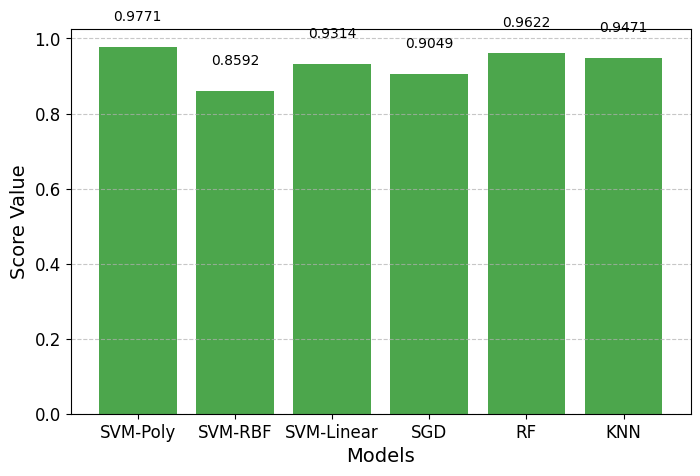

In [21]:
accuracy_score = [0.9771,0.8592,0.9314,0.9049,0.9622,0.9471]

plt.figure(figsize=(8, 5))
x_positions = range(len(accuracy_score))
plt.bar(x_positions, accuracy_score, color='g', alpha=0.7)
x_labels = ['SVM-Poly', 'SVM-RBF', 'SVM-Linear', 'SGD', 'RF', 'KNN']
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Models')
plt.ylabel('Score Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(accuracy_score):
    plt.text(i, value + 0.1, str(value), ha='center', va='top', fontsize=10, color='black')

plt.show()

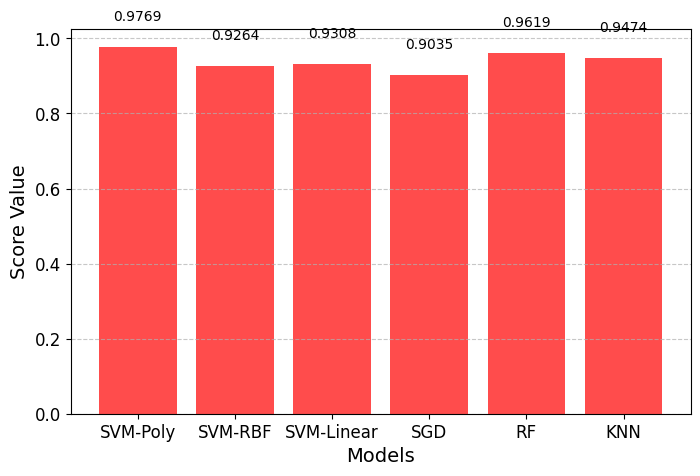

In [28]:
precision_score = [0.9769,0.9264,0.9308,0.9035,0.9619,0.9474]

plt.figure(figsize=(8, 5))
x_positions = range(len(precision_score))
plt.bar(x_positions, precision_score, color='r', alpha=0.7)
x_labels = ['SVM-Poly', 'SVM-RBF', 'SVM-Linear', 'SGD', 'RF', 'KNN']
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Models')
plt.ylabel('Score Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(precision_score):
    plt.text(i, value + 0.1, str(value), ha='center', va='top', fontsize=10, color='black')

plt.show()

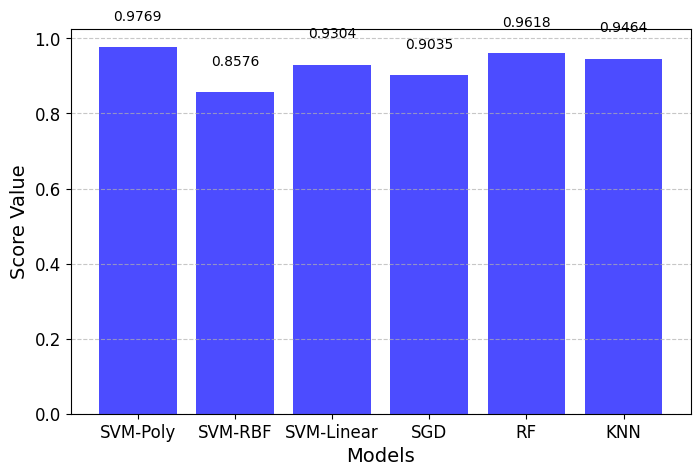

In [29]:
recall_score = [0.9769,0.8576,0.9304,0.9035,0.9618,0.9464]

plt.figure(figsize=(8, 5))
x_positions = range(len(recall_score))
plt.bar(x_positions, recall_score, color='b', alpha=0.7)
x_labels = ['SVM-Poly', 'SVM-RBF', 'SVM-Linear', 'SGD', 'RF', 'KNN']
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Models')
plt.ylabel('Score Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(recall_score):
    plt.text(i, value + 0.1, str(value), ha='center', va='top', fontsize=10, color='black')

plt.show()

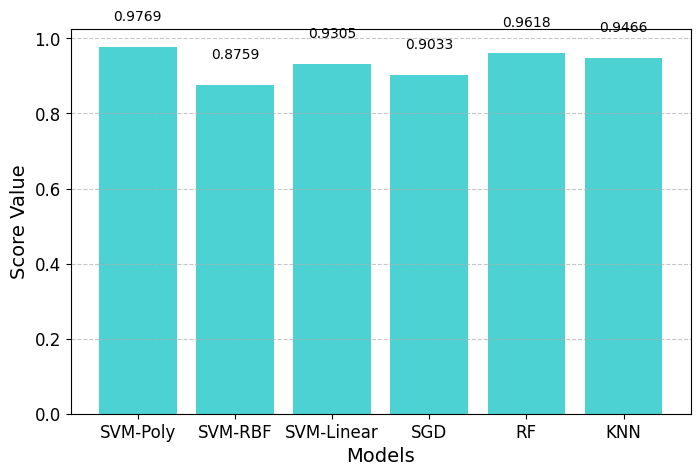

In [30]:
f1_score = [0.9769,0.8759,0.9305,0.9033,0.9618,0.9466]

plt.figure(figsize=(8, 5))
x_positions = range(len(f1_score))
plt.bar(x_positions, f1_score, color='c', alpha=0.7)
x_labels = ['SVM-Poly', 'SVM-RBF', 'SVM-Linear', 'SGD', 'RF', 'KNN']
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Models')
plt.ylabel('Score Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(f1_score):
    plt.text(i, value + 0.1, str(value), ha='center', va='top', fontsize=10, color='black')

plt.show()

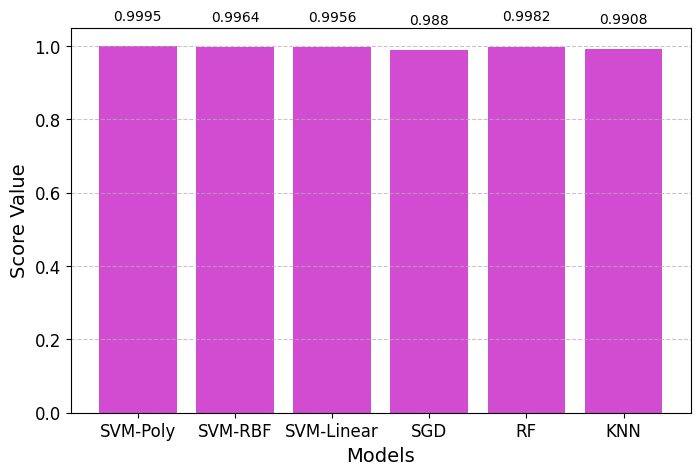

In [31]:
roc_auc_score = [0.9995,0.9964,0.9956,0.9880,0.9982,0.9908]

plt.figure(figsize=(8, 5))
x_positions = range(len(roc_auc_score))
plt.bar(x_positions, roc_auc_score, color='m', alpha=0.7)
x_labels = ['SVM-Poly', 'SVM-RBF', 'SVM-Linear', 'SGD', 'RF', 'KNN']
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Models')
plt.ylabel('Score Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(roc_auc_score):
    plt.text(i, value + 0.1, str(value), ha='center', va='top', fontsize=10, color='black')

plt.show()

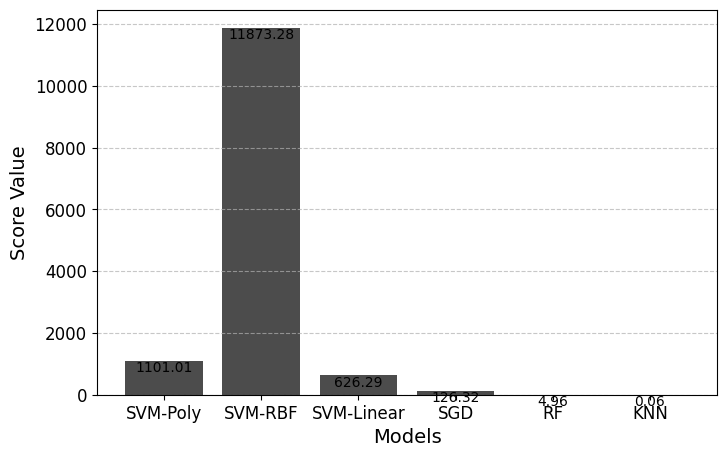

In [32]:
training_time = [1101.01,11873.28,626.29,126.32,4.96,0.06]

plt.figure(figsize=(8, 5))
x_positions = range(len(training_time))
plt.bar(x_positions, training_time, color='k', alpha=0.7)
x_labels = ['SVM-Poly', 'SVM-RBF', 'SVM-Linear', 'SGD', 'RF', 'KNN']
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Models')
plt.ylabel('Score Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(training_time):
    plt.text(i, value + 0.1, str(value), ha='center', va='top', fontsize=10, color='black')

plt.show()